Collecting all the necessary functions form packages

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from skimage.color import rgb2hsv, hsv2rgb, rgb2lab, deltaE_cie76
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.signal import find_peaks

Finding and showing the example image

(-0.5, 1079.5, 719.5, -0.5)

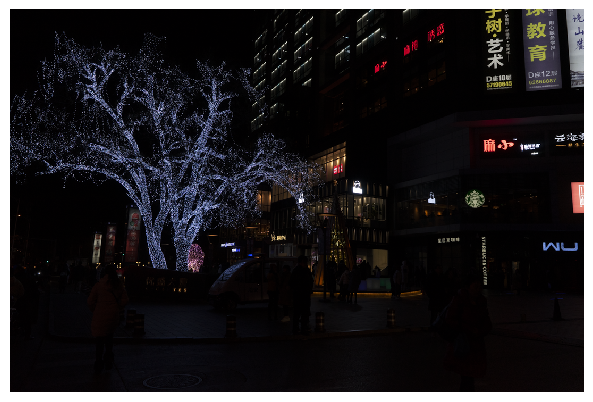

In [70]:
im_name = "C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/low_light_enhancement/images/dark_img_2.png"
im_org = io.imread(im_name)
io.imshow(im_org)
plt.axis("off")

Extracting the value channel of the corresponding HSV image

In [71]:
im_hsv = rgb2hsv(im_org)
V = im_hsv[:, :, 2]
V = np.uint8(V * 255)
hist, _ = np.histogram(V.ravel(), bins = 256)

Perform BBHE histogram equalisation

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

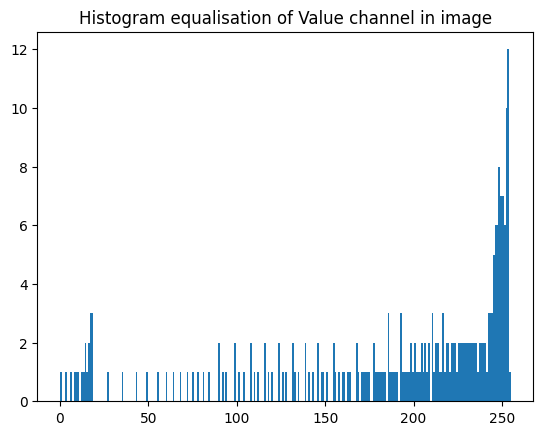

In [72]:
V_mean = np.uint8(np.round(np.mean(V)))

V_mlow = hist[:(V_mean + 1)]
V_mhigh = hist[(V_mean + 1):]

V_mlhist = V_mlow.cumsum() / np.sum(V_mlow)
V_mhhist = V_mhigh.cumsum() / np.sum(V_mhigh)

V_mlhist = np.round(V_mean * V_mlhist)
V_mhhist = np.round(V_mean + (hist.shape[0] - 1 - V_mean) * V_mhhist)

V_BBHE = np.concatenate((V_mlhist, V_mhhist), axis = 0)

plt.figure()
plt.hist(V_BBHE.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Perform BPHEME histogram equalisation

Text(0.5, 1.0, 'Histogram equalisation of Value channel in image')

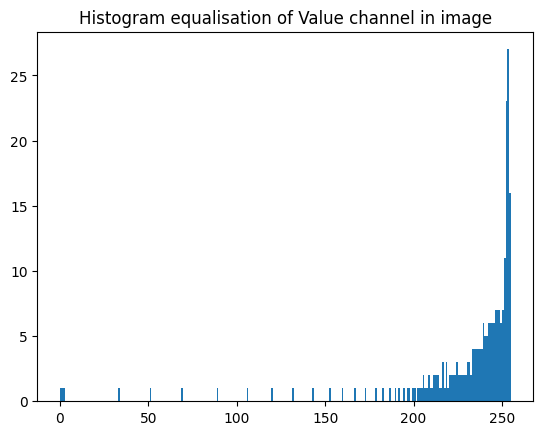

In [73]:
peaks, _ = find_peaks(hist)

if len(peaks) > 0:
    V_peak = peaks[0]
else:
    V_peak = np.argmax(hist)

V_plow = hist[:(V_peak + 1)]
V_phigh = hist[(V_peak + 1):]

V_plhist = V_plow.cumsum() / np.sum(V_plow)
V_phhist = V_phigh.cumsum() / np.sum(V_phigh)

V_plhist = np.round(V_peak * V_plhist)
V_phhist = np.round(V_peak + (hist.shape[0] - 1 - V_peak) * V_phhist)

V_BPHEME = np.concatenate((V_plhist, V_phhist), axis = 0)

plt.figure()
plt.hist(V_BPHEME.ravel(), bins = 256)
plt.title("Histogram equalisation of Value channel in image")

Transform the enhanced image back to RGB

(-0.5, 1079.5, 719.5, -0.5)

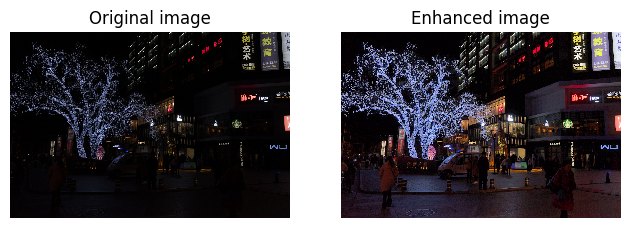

In [74]:
im_BBHEhsv = im_hsv.copy()
im_BPHEMEhsv = im_hsv.copy()

im_BBHEhsv[:, :, 2] = cv.LUT(V, V_BBHE) / 255
im_BPHEMEhsv[:, :, 2] = cv.LUT(V, V_BPHEME) / 255

im_BBHE = hsv2rgb(im_BBHEhsv)
im_BPHEME = hsv2rgb(im_BPHEMEhsv)

weight = 0.7
im_enh = weight * im_BBHE + (1 - weight) * im_BPHEME
im_enh = np.uint8(im_enh * 255)

plt.figure()

plt.subplot(1, 2, 1)
io.imshow(im_org)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(im_enh)
plt.title("Enhanced image")
plt.axis("off")

Plotting the final histograms

Text(0.5, 1.0, 'Histogram of the enhanced image')

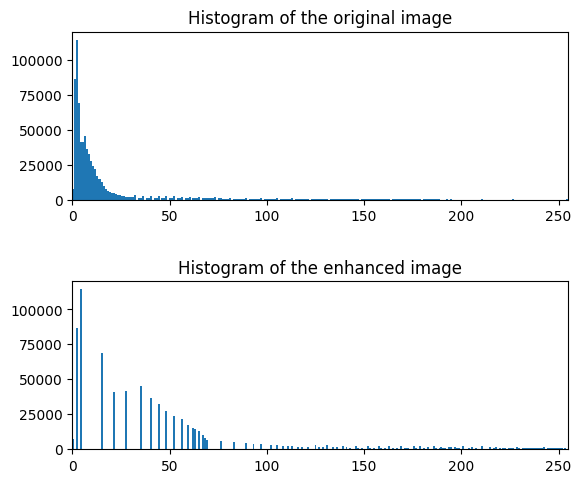

In [75]:
HSV_enh = rgb2hsv(im_enh)
V_enh = np.uint8(HSV_enh[:, :, 2] * 255)

figs, ax = plt.subplots(2, 1)

plt.subplot(2, 1, 1)
plt.hist(V.ravel(), bins = 256)
plt.xlim((0, 255))
plt.title("Histogram of the original image")

plt.subplot(2, 1, 2)
plt.hist(V_enh.ravel(), bins = 256)
plt.xlim((0, 255))
pos = ax[1].get_position()
new_pos = [pos.x0, pos.y0 - 0.1, pos.width, pos.height]
ax[1].set_position(new_pos)
plt.title("Histogram of the enhanced image")

Evaluation with SSIM, PSNR and DeltaE

SSIM result:	0.4367523907478123
PSNR result:	14.64119699492279
Delta_E average result:	13.54116918303424


Text(0.5, 1.0, '$\\Delta$E as an image')

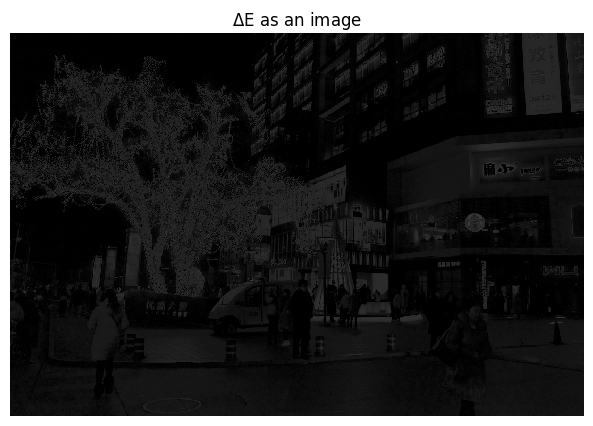

In [81]:
eval_ssim = ssim(V, V_enh)
eval_psnr = psnr(V, V_enh)
im_orgLAB = rgb2lab(im_org)
im_enhLAB = rgb2lab(im_enh)
eval_coldif = deltaE_cie76(im_orgLAB, im_enhLAB)

print("SSIM result:\t" + str(eval_ssim) + "\nPSNR result:\t" + str(eval_psnr) + "\nDelta_E average result:\t" + str(np.mean(eval_coldif)))

plt.figure()
io.imshow(np.uint8(np.round(eval_coldif)))
plt.axis("off")
plt.title(r"$\Delta$E as an image")

Save images

In [77]:
save_image = False

if save_image:
    io.imsave("C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/results/BBHE_Res.png", im_enh)
    io.imsave("C:/Users/shaia/Documents/Opgaveregning/AutoSys/1. semester/Computational billedbehandling og spektroskopi/34269_computer_imaging_and_spectroscopy/results/BBHE_DeltaE.png", np.uint8(np.round(eval_coldif)))

Trying out with YCbCr color space

In [78]:
try_out = False

if try_out:
    from skimage.color import rgb2ycbcr, ycbcr2rgb

    im_ycbcr = rgb2ycbcr(im_org)
    Y = im_ycbcr[:, :, 0]
    hist, _ = np.histogram(Y.ravel(), bins = 256)

    Y_mean = np.uint8(np.round(np.mean(Y)))

    Y_mlow = hist[:(Y_mean + 1)]
    Y_mhigh = hist[(Y_mean + 1):]

    Y_mlhist = Y_mlow.cumsum() / np.sum(Y_mlow)
    Y_mhhist = Y_mhigh.cumsum() / np.sum(Y_mhigh)

    Y_mlhist = np.round(Y_mean * Y_mlhist)
    Y_mhhist = np.round(Y_mean + (hist.shape[0] - 1 - Y_mean) * Y_mhhist)

    Y_BBHE = np.concatenate((Y_mlhist, Y_mhhist), axis = 0)

    peaks, _ = find_peaks(hist)

    if len(peaks) > 0:
        Y_peak = peaks[0]
    else:
        Y_peak = np.argmax(hist)

    Y_plow = hist[:(Y_peak + 1)]
    Y_phigh = hist[(Y_peak + 1):]

    Y_plhist = Y_plow.cumsum() / np.sum(Y_plow)
    Y_phhist = Y_phigh.cumsum() / np.sum(Y_phigh)

    Y_plhist = np.round(Y_peak * Y_plhist)
    Y_phhist = np.round(Y_peak + (hist.shape[0] - 1 - Y_peak) * Y_phhist)

    Y_BPHEME = np.concatenate((Y_plhist, Y_phhist), axis = 0)

    im_BBHEhsv = im_ycbcr.copy()
    im_BPHEMEhsv = im_ycbcr.copy()

    im_BBHEhsv[:, :, 0] = cv.LUT(np.uint8(Y), Y_BBHE)
    im_BPHEMEhsv[:, :, 0] = cv.LUT(np.uint8(Y), Y_BPHEME)

    im_BBHE = ycbcr2rgb(im_BBHEhsv)
    im_BPHEME = ycbcr2rgb(im_BPHEMEhsv)

    weight = 0.7
    im_enh = weight * im_BBHE + (1 - weight) * im_BPHEME
    im_enh = np.uint8(im_enh * 255)

    plt.figure()

    plt.subplot(1, 2, 1)
    io.imshow(im_org)
    plt.title("Original image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    io.imshow(im_enh)
    plt.title("Enhanced image")
    plt.axis("off")